
# opencv

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def show_img(img):
    """方便我们观察图像"""
    plt.figure(frameon=False)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.show()


## 基本操作

### 读取、显示、写回

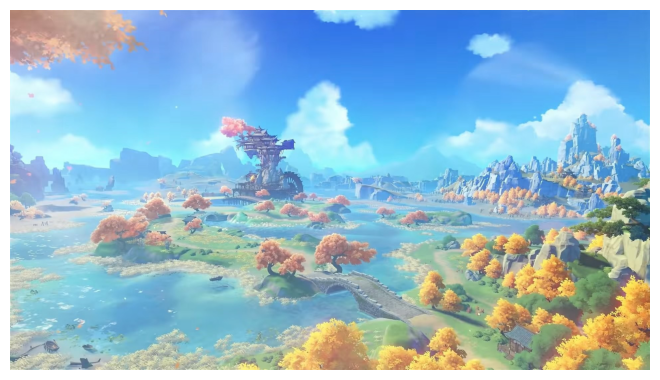

True

In [2]:
png_name = "./dataBase/demo.jpg"
img = cv2.imread(png_name)
if img is None:
    print("read error")
    exit(0)
show_img(img)
cv2.imwrite('./dataBase/demo_write.png', img)

### 像素操作

图像坐标：每张图片左上角为坐标 0,0 点，如果向右为 x 轴，向下为 y 轴。 由于 ndarray 第一维是行，第二维是列（或者更加通俗的说是height-width），所以 (x,y) 坐标指定的像素对应到 image[y,x]。对于第三个值代表三个颜色通道，在opencv中像素值顺序为 BGR。

In [144]:
type(img), img.dtype, img.shape

(numpy.ndarray, dtype('uint8'), (1080, 1920, 3))

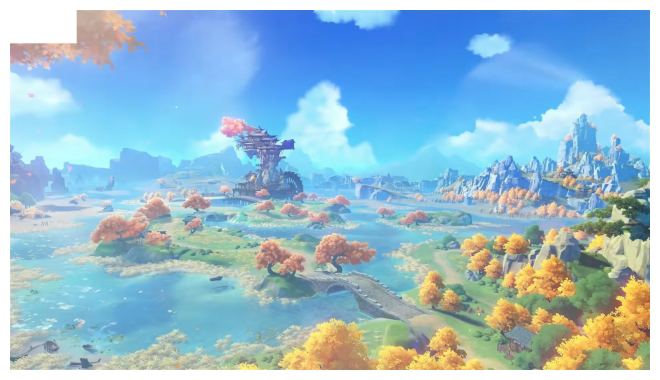

In [145]:
# 将图片左上角 50x100 变为白色
img[0:100, 0:200] = [255, 255, 255]
show_img(img)

### 实操：绘制国际象棋盘

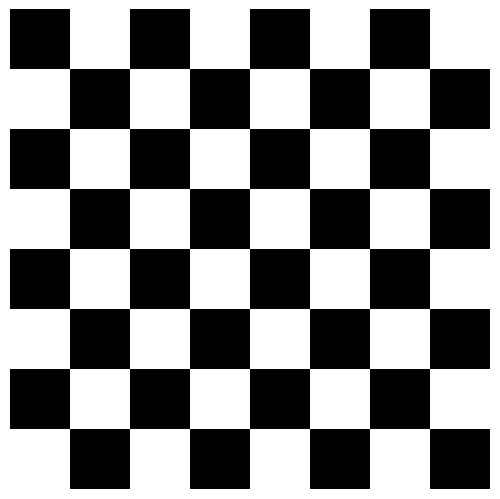

In [ ]:
def chessboard(square=10, size=4, color=(0xff,0xff,0xff)):
    '''Create a chessboard color means RGB'''
    color = color[::-1] # 变为opencv 的操作格式
    base = np.zeros((square, square, 3), dtype='uint8')
    block0 = np.hstack(((base, (base + 1) * color))).astype(np.uint8)
    block1 = block0[:, ::-1, :]
    canvas = np.hstack((block0, block1))

    return np.tile(canvas, (size, size, 1))
show_img(chessboard(square=1))

### 图像绘制

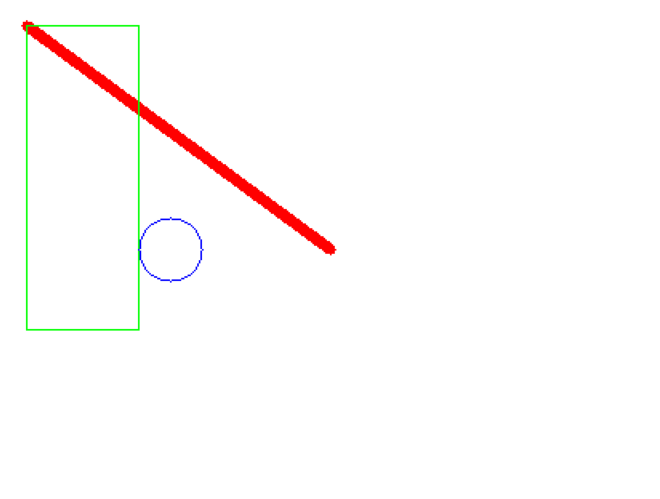

In [147]:
canvas = np.ones((300, 400, 3), dtype="uint8") * 255 # 绘制白布
Red = (0, 0, 0xff)
Green = (0, 0xff, 0)
Blue = (0xff, 0, 0)
# cv2.line(img, pt1<start>, pt2<end>, color[, thickness<line_width, -1 stands for filling>[, lineType[, shift]]]) -> img
cv2.line(canvas, (10, 10), (200, 150), Red, thickness=5)
# cv2.rectangle(img, pt1<left-up>, pt2<right-down>, color[, thickness[, lineType[, shift]]]) -> img
cv2.rectangle(canvas, (10, 10), (80, 200), Green, thickness=1)
# cv2.circle(img, center<center of circle>, radius, color[, thickness[, lineType[, shift]]]) -> img
cv2.circle(canvas, (100, 150), 20, Blue, thickness=1)
show_img(canvas)

### 图像变换

我们可以利用矩阵来实现图像的平移、旋转、缩放等操作。

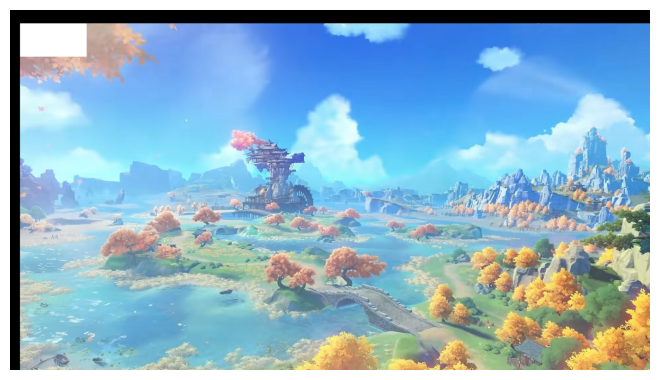

In [148]:
def shift_rd(img, right=0, down=0):
    """ right-down shift"""
    shift = np.float32([[1, 0, right], [0, 1, down]])
    return cv2.warpAffine(img, shift, (img.shape[1], img.shape[0]))
show_img(shift_rd(img, 30, 40))

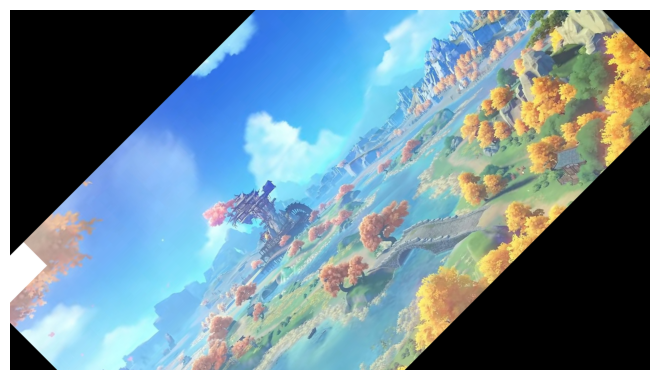

In [149]:
def counterclockwise_rotation(img, angle):
    '''roate img around center of img'''
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    rotation = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, rotation, (w, h))
show_img(counterclockwise_rotation(img, 45))

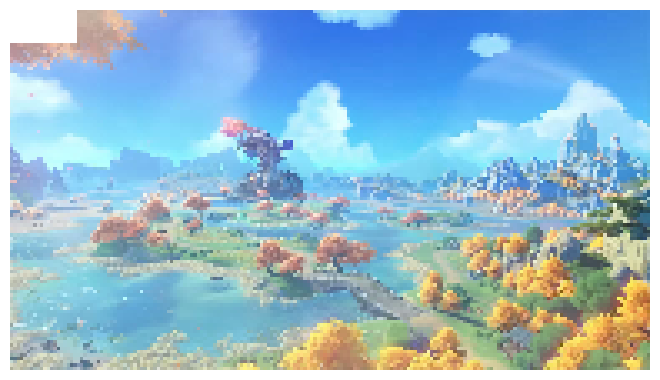

In [150]:
def resize(img, rate):
    """
    Resize the image by a given rate.
    
    Parameters:
    img (numpy.ndarray): The input image.
    rate (float): The scaling factor. A rate > 1 will enlarge the image, while a rate < 1 will shrink it.
    
    Returns:
    numpy.ndarray: The resized image.
    """
    height, width = img.shape[:2]
    new_dimensions = (int(width * rate), int(height * rate))
    return cv2.resize(img, new_dimensions, interpolation=cv2.INTER_LINEAR)

show_img(resize(img, 0.1))

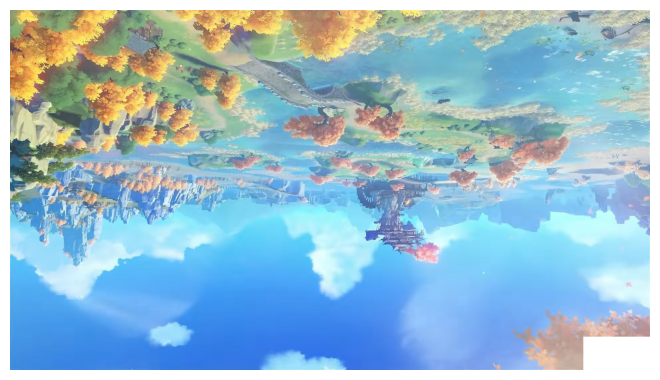

In [151]:
def flip(image, flip='b'):
    '''h/H:horizontally; v/V: vertically; b/B:both'''
    flip_type = 1

    if flip == 'v' or flip == 'V':
        flip_type = 0
    elif flip == 'b' or flip == 'B':
        flip_type = -1

    return cv2.flip(image, flip_type)
show_img(flip(img))

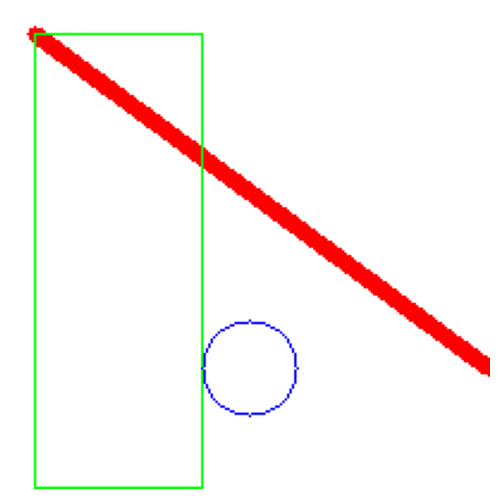

In [152]:
def crop(img, pt1=(0,0), pt2=(0,0)):
    return img[pt1[1]:pt2[1] + 1, pt1[0]:pt2[0] + 1]

show_img(crop(canvas, (0, 0), (200, 200)))

## 颜色通道操作
### 图像亮度调整

我们可以对像素进行加减以改变图像的整体颜色强度：变浅或变深。

OpenCV 提供的加减运算方法进行截断操作，也即总是保证数值不大于 255，且不小于 0，这与 numpy 不同，numpy 操作可能会溢出。

In [153]:
print(f"max of 255: {cv2.add(np.uint8([200]), np.uint8([100]))}")
print(f"min of 0: {cv2.subtract(np.uint8([50]), np.uint8([100]))}")
print(f"wrap around: {np.uint8([200]) + np.uint8([100])}")
print(f"wrap around: {np.uint8([50]) - np.uint8([100])}")

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


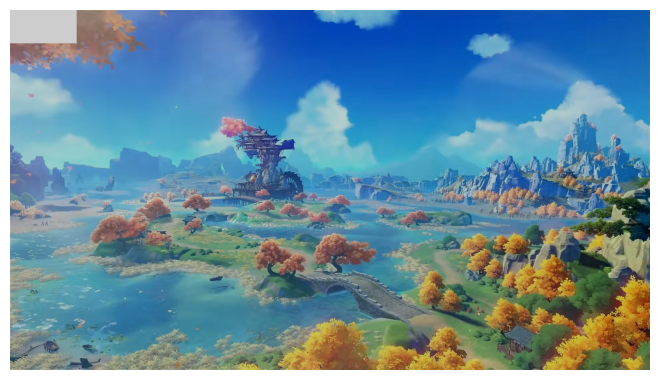

In [154]:
def light(img, light):
    '''lighten the img, negative for darken'''
    if abs(light) > 255:
        light = int((light/light) * 255)

    if light < 0:
        M = np.ones(img.shape, dtype = "uint8") * (-light)
        return cv2.subtract(img, M)
    else:
        M = np.ones(img.shape, dtype = "uint8") * light
        return cv2.add(img, M)
show_img(light(img, -50))

### 通道分离与合并

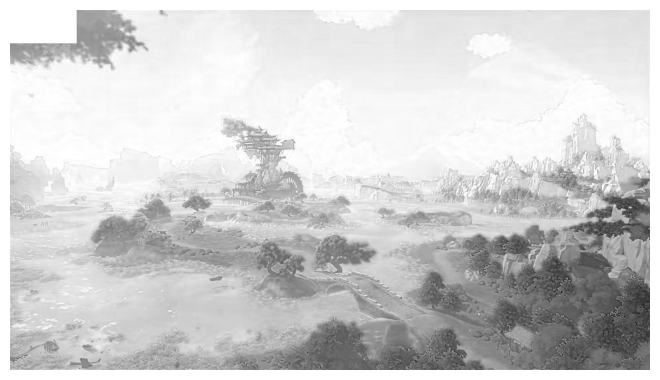

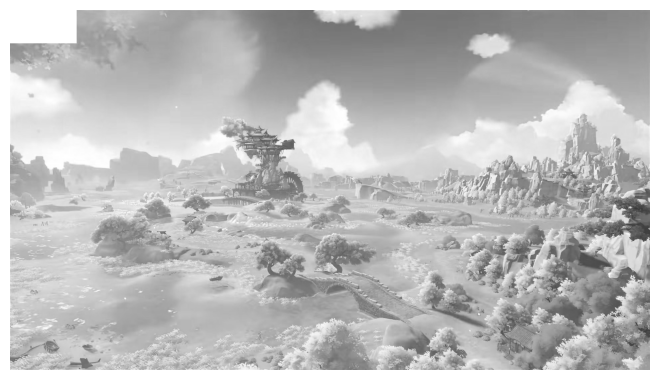

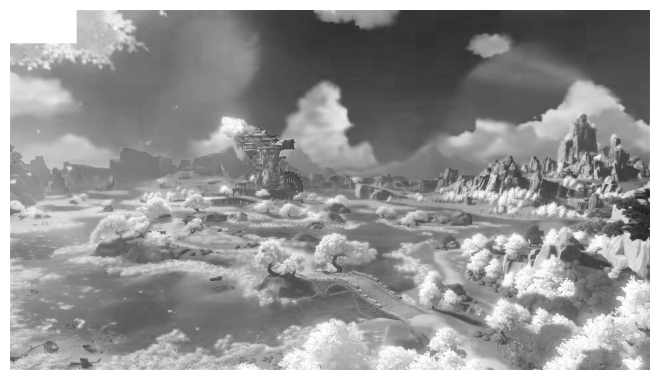

(None, None, None)

In [155]:
# 分离
B,G,R = cv2.split(img)
show_img(B), show_img(G), show_img(R)

为何分离通道后的图像显示为灰度图？可以发现分离后的 B，G 和 R 没有第三个维度，所以每一通道数据均被解释为了灰度数据：图像越明亮，则该通道颜色分量越大，图像越暗淡，对应通道的颜色分量越小。可以看到上面图中，B对应图的天空就非常亮。下面这样“合并”后可能更接近我们认为的各通道图：

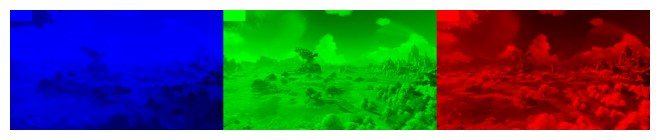

In [162]:
# 合并
show_img(np.hstack([cv2.merge([B, G*0, R*0]),cv2.merge([B*0, G, R*0]), cv2.merge([B*0, G*0, R])]))

## 图像平滑

与直方图均衡提高图像对比度不同，“平滑处理“（Smoothing）也称“模糊处理”（Bluring），平滑处理常用来减少图像上的噪点或者失真。

### 均值滤波

即用卷积器覆盖区域所有像素的平均值来代替中心元素。

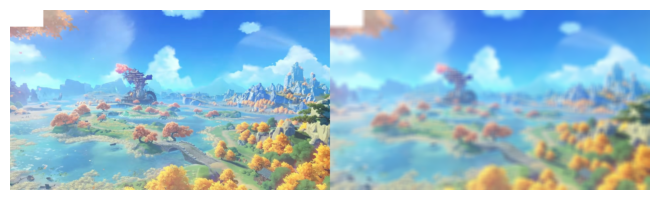

In [163]:
# cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) -> dst
show_img(np.hstack([cv2.blur(img, (5, 5)), cv2.blur(img, (30, 30))]))

### 高斯滤波

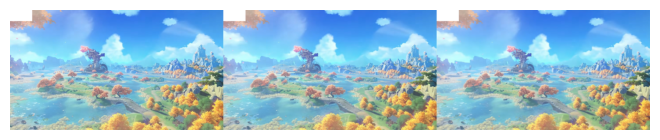

In [164]:
show_img(np.hstack([cv2.GaussianBlur(img, (3, 3), 0),cv2.GaussianBlur(img, (5, 5), 0),cv2.GaussianBlur(img, (7, 7), 0)]))

### 其他滤波

需要再查吧：medianBlur/bilateralFilter

## 图像梯度

（一些算子暂且搁置，先重使用）

### 边缘检测 Canny

边缘检测通常使用 Canny 算法。它是 John F.Canny 在1986 年提出的。它是一个有很多步构成的算法：包括噪声去除，计算图像梯度，非极大值抑制（NMS）和滞后阈值几部分。

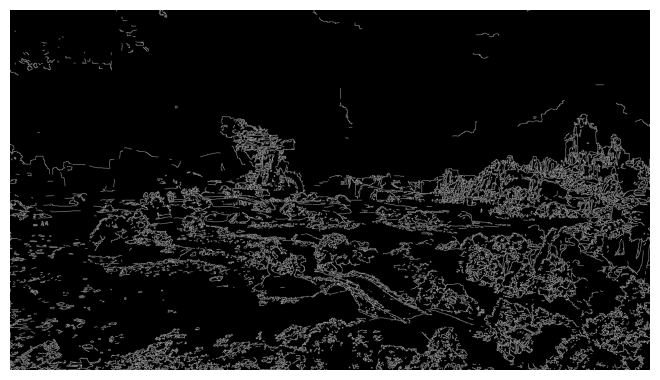

In [14]:
# cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
# 大于 threshold2 的值被认为是边缘，小于 threshold1 的值不被认为是边缘 。位于中间的像素由连接性判断是否为边缘。
canny = cv2.Canny(img, 100, 150)
show_img(canny)


cv2.findContours 用于在黑白二值图中查找轮廓，它接受三个参数：输入图像（二值图像），轮廓检索方式和轮廓近似方法：

| 轮廓检索方式          | 描述                                         |
|:---------------------:|:--------------------------------------------:|
| cv2.RETR_EXTERNAL   | 只检测外轮廓                                 |
| cv2.RETR_LIST      | 检测的轮廓不建立等级关系                     |
| cv2.RETR_CCOMP     | 建立两个等级的轮廓，上面一层为外边界，里面一层为内孔的边界信息 |
| cv2.RETR_TREE      | 建立一个等级树结构的轮廓                     |



| 轮廓近似方法          | 描述                                         |
|:---------------------:|:--------------------------------------------:|
| cv2.CHAIN_APPROX_NONE    | 存储所有边界点                             |
| cv2.CHAIN_APPROX_SIMPLE  | 压缩垂直、水平、对角方向，只保留端点         |
| cv2.CHAIN_APPROX_TX89_L1 | 使用 teh-Chini 近似算法                    |
| cv2.CHAIN_APPROX_TC89_KCOS | 使用 teh-Chini 近似算法                    |

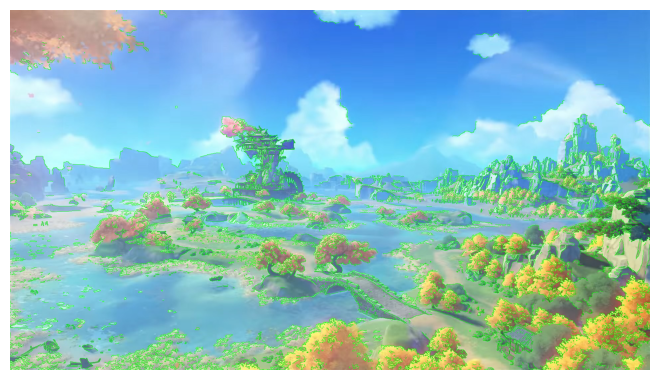

In [16]:
img1 = img.copy() # drawContours 会改变原图，所以复制一份确保每次运行结果相同
# cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
cnts, hierarchy = cv2.findContours(canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
show_img((np.hstack([cv2.drawContours(img1, cnts, -1, (0,255,0), 1)])))

In [173]:
help(cv2.drawContours)

Help on built-in function drawContours:

drawContours(...)
    drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
    .   @brief Draws contours outlines or filled contours.
    .   
    .   The function draws contour outlines in the image if \f$\texttt{thickness} \ge 0\f$ or fills the area
    .   bounded by the contours if \f$\texttt{thickness}<0\f$ . The example below shows how to retrieve
    .   connected components from the binary image and label them: :
    .   @include snippets/imgproc_drawContours.cpp
    .   
    .   @param image Destination image.
    .   @param contours All the input contours. Each contour is stored as a point vector.
    .   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    .   @param color Color of the contours.
    .   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
    .   thickness

#